<a href="https://colab.research.google.com/github/Longownica/psi_homework/blob/main/Z03_D_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-wymiarowy rozkład Normalny

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [2]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

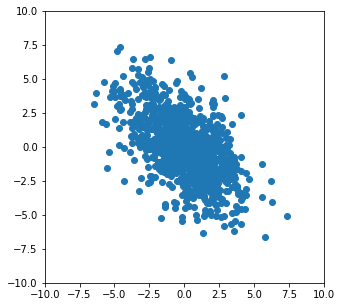

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [4]:
means = X.mean(axis=0)
cov = np.cov(X.T)

# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [5]:
X2_rv=multivariate_normal(means, cov)

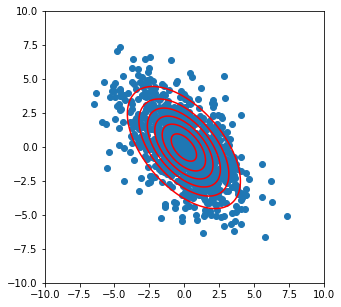

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'r')
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[-0.02286352 -0.04651383]
[-0.76940265  0.63876409]
[[-0.02286352 -0.04651383  3.51113633 -4.22922589]
 [-0.02286352 -0.04651383 -2.25105582 -1.8688441 ]]


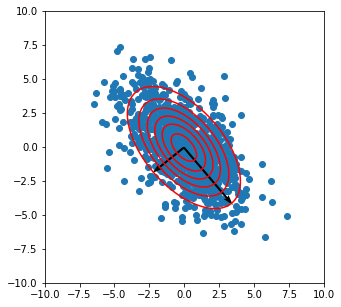

In [7]:
e_values, e_vectors = np.linalg.eig(cov)
print(means)
print(e_vectors[0,:])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

#plot eigen vectors
soa =np.array( [ [means[0],means[1],2*np.sqrt(e_values[1])*e_vectors[0,1],2*np.sqrt(e_values[1])*e_vectors[1,1]],
                 [means[0],means[1],2*np.sqrt(e_values[0])*e_vectors[0,0],2*np.sqrt(e_values[0])*e_vectors[1,0]]] )
print(soa)
X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)

# plot levelsets
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'r')
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[0.48512359 0.4923588 ]
[[ 0.99797046 -0.06367856]
 [ 0.06367856  0.99797046]]
[[ 0.48512359  0.4923588  -0.0364642   0.571467  ]
 [ 0.48512359  0.4923588   0.58138234  0.03709688]]


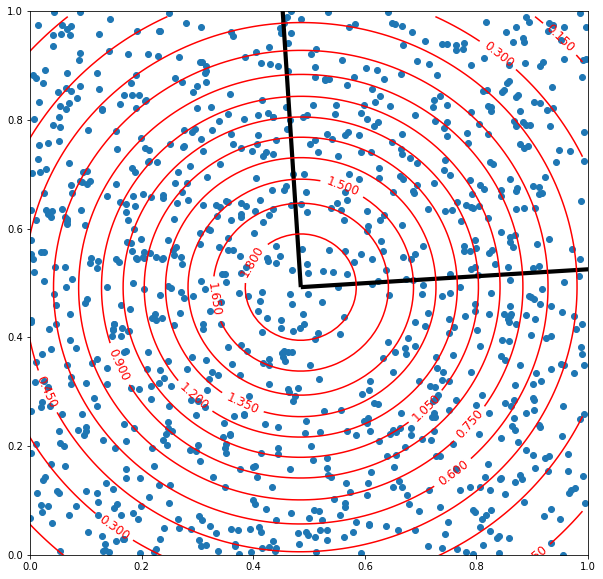

In [13]:
X = np.stack( (stats.uniform(0, 1).rvs(1000),stats.uniform(0, 1).rvs(1000)), 1)
means = X.mean(axis=0)
cov = np.cov(X.T)
X2_rv = multivariate_normal(means, cov)

values, vectors = np.linalg.eig(cov)
print(means)
print(vectors)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([0,1])
ax.set_ylim([0,1])

soa =np.array( [ [means[0], means[1], 2*np.sqrt(values[1])*vectors[0,1], 2*np.sqrt(values[1])*vectors[1,1]],
                 [means[0], means[1], 2*np.sqrt(values[0])*vectors[0,0], 2*np.sqrt(values[0])*vectors[1,0]]])
print(soa)
X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
CS = ax.contour(x, y, X2_rv.pdf(pos), 12, colors = 'r')
ax.clabel(CS, inline=2, fontsize=12)
plt.show()